<a href="https://colab.research.google.com/github/OMKARTT/PythonPracticeCode/blob/main/Copy_of_Regression_Working_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required base libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset by file uploads
#hospital_df = pd.read_csv('HospitalCosts.csv')

# Loading the dataset through GitHub
url = 'https://raw.githubusercontent.com/ShishirIITM/Training_Prog_Dataset/main/GAVS_Datasets/HospitalCosts.csv'
hospital_df = pd.read_csv(url)

In [3]:
# View size of the dataset
np.shape(hospital_df)

(500, 6)

In [4]:
# View the first five rows of the dataset
hospital_df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [5]:
# Checking for missing values in the dataset
# Display rows with missing data
hospital_df[hospital_df.isnull().any(axis=1)]

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
276,0,1,2,NaN,1156,640


In [6]:
# Dropping the one row with missing value in RACE column
hospital_df = hospital_df.dropna()
hospital_df.reset_index(inplace=True)
print(hospital_df.isnull().sum())

index     0
AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64


# Regression

## Simple linear regression

Let us see the relationship between **age** and the **hospital stay cost** with the help of a scatter plot.

In [7]:
import matplotlib.pyplot as plt

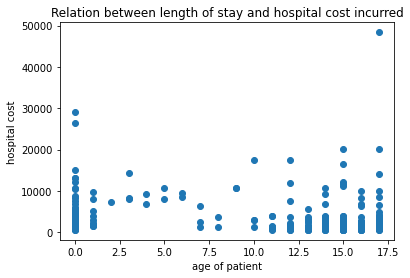

In [9]:
plt.scatter(hospital_df.AGE, hospital_df.TOTCHG)
plt.xlabel('age of patient')
plt.ylabel('hospital cost')
plt.title('Relation between length of stay and hospital cost incurred')
plt.show()

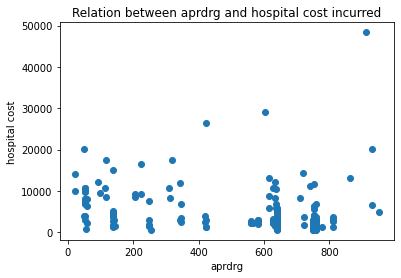

In [10]:
plt.scatter(hospital_df.APRDRG,hospital_df.TOTCHG)
plt.xlabel('aprdrg')
plt.ylabel('hospital cost')
plt.title('Relation between aprdrg and hospital cost incurred')
plt.show()

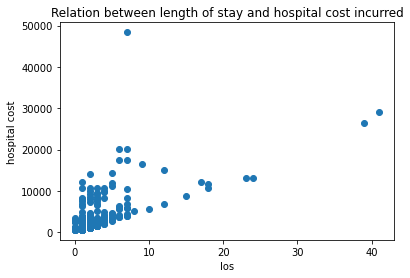

In [11]:
plt.scatter(hospital_df.LOS,hospital_df.TOTCHG)
plt.xlabel('los')
plt.ylabel('hospital cost')
plt.title('Relation between length of stay and hospital cost incurred')
plt.show()

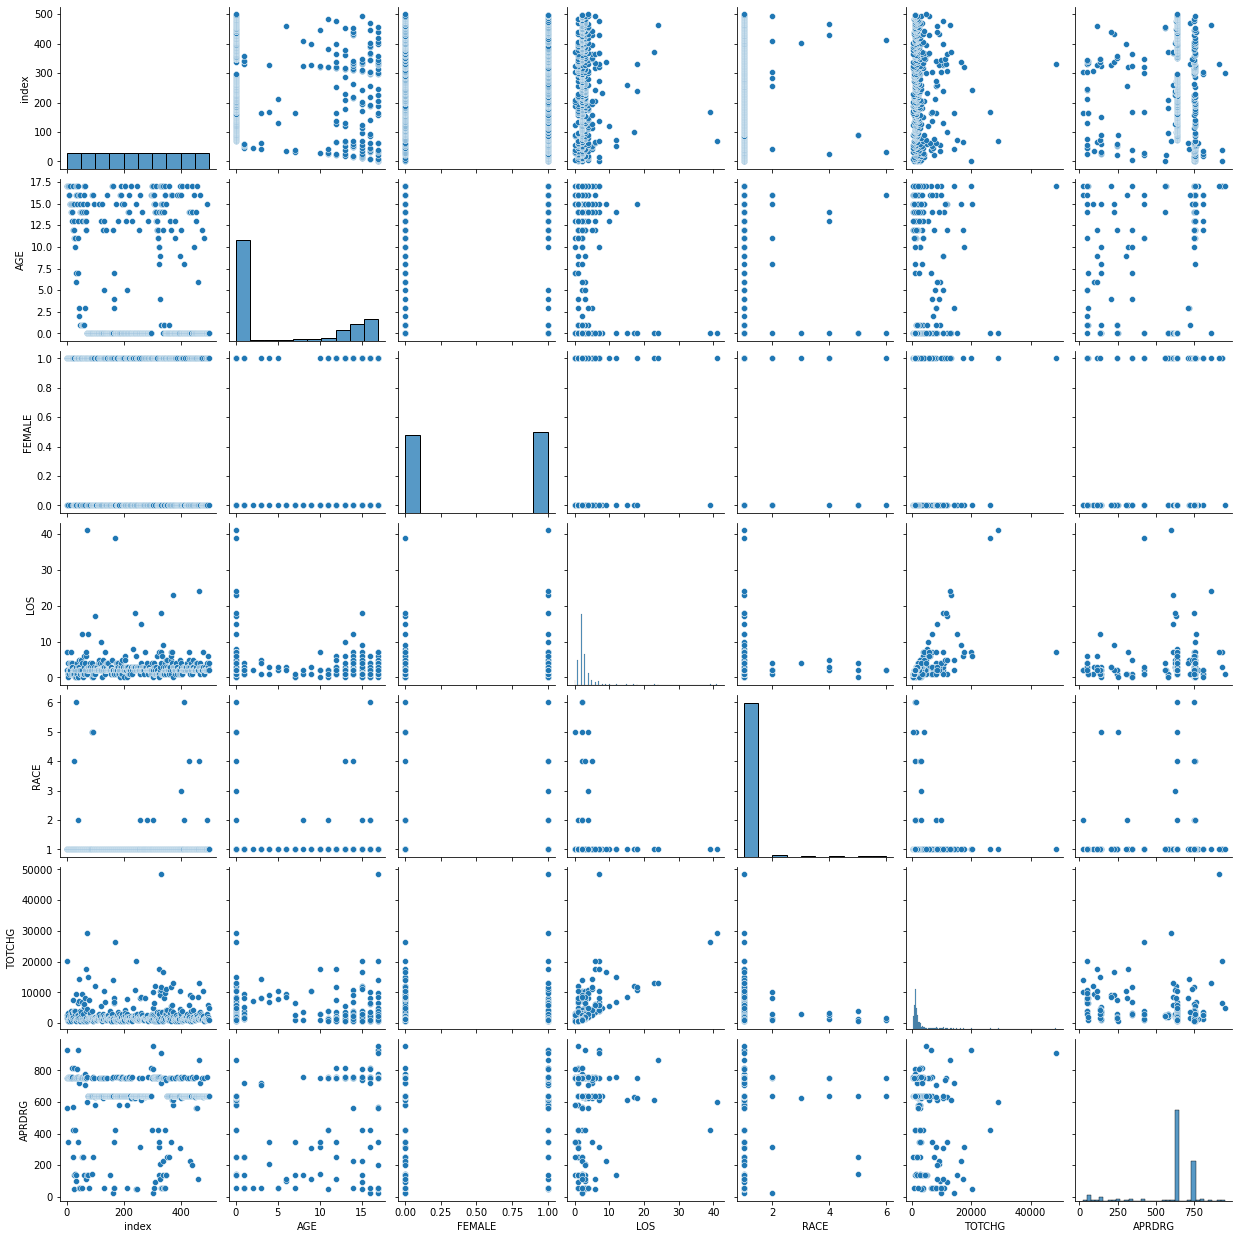

In [13]:
import seaborn as sns

sns.pairplot(hospital_df)

Build a linear regression model with age as independent variable and Hospital cost as dependent variable  


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
X =hospital_df[['AGE']] 
y = hospital_df[['TOTCHG']]
print(X)
print(y)

     AGE
0     17
1     17
2     17
3     17
4     17
..   ...
494    0
495    0
496    0
497    0
498    0

[499 rows x 1 columns]
     TOTCHG
0      2660
1      1689
2     20060
3       736
4      1194
..      ...
494    5881
495    1171
496    1171
497    1086
498    4931

[499 rows x 1 columns]


In [18]:
# In order to train a model, we take just 80% of the entire data available. 
# The other 20% will later be used for testing the built model.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=100)


In [19]:
X_train

,AGE
205,17
445,0
321,10
368,16
55,1
...,...
343,16
359,0
323,8
280,0


In [20]:
y_train

,TOTCHG
205,3315
445,1120
321,17524
368,2238
55,9606
...,...
343,1422
359,1097
323,3588
280,2724


In [21]:
X_test

,AGE
69,13
29,10
470,0
494,0
54,13
...,...
282,0
152,0
154,0
56,1


In [22]:
y_test

,TOTCHG
69,628
29,2860
470,1411
494,5881
54,1211
...,...
282,1211
152,1269
154,1396
56,1411


In [23]:
## Use the training set and build a simple linear regression model.

lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [24]:
# Print coefficients
lm1.coef_

array([[61.55113579]])

In [25]:
# Print intercept
lm1.intercept_

array([2437.59945626])

Using the built model, predict the hospital stay cost for the test set of AGE. 

In [27]:
## Use the fitted model to predict hospital stay cost on test set
y_pred = lm1.predict(X_test)

Evaluate the model using the R^2 score.

In [33]:
# For test data
lm1.score(X_test,y_test)

0.018868458569048507

In [31]:
# For train data
lm1.score(X_train,y_train)

0.01544044941281042

Calculate the mean squared error

In [34]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(mse1)
print('Mean squared error for the first model is: ', mse1)
print('Root mean squared error for the first model is: ', rmse1)

Mean squared error for the first model is:  26588172.74266924
Root mean squared error for the first model is:  5156.3720523900565


OLS using statsmodels library

In [35]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
x_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

# Print summary of model 
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.226
Date:                Thu, 14 Jul 2022   Prob (F-statistic):             0.0130
Time:                        11:24:17   Log-Likelihood:                -3816.8
No. Observations:                 399   AIC:                             7638.
Df Residuals:                     397   BIC:                             7646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2437.5995    217.581     11.203      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Plotting a regression line

In [39]:
import seaborn as sb

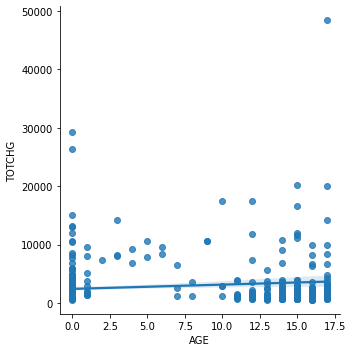

In [42]:
# AGE vs TOTCHG
df = hospital_df[['AGE','TOTCHG']]
  
# use lmplot
sb.lmplot(x='AGE',y='TOTCHG',data=df)

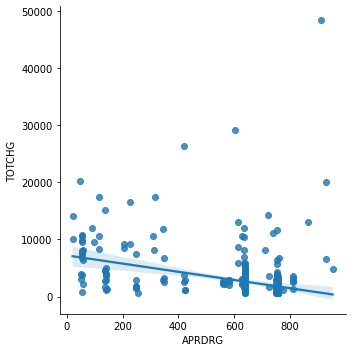

In [43]:
# APRDRG vs TOTCHG
df = hospital_df[['APRDRG','TOTCHG']]

# use lmplot
sb.lmplot(x='APRDRG',y='TOTCHG',data=df)

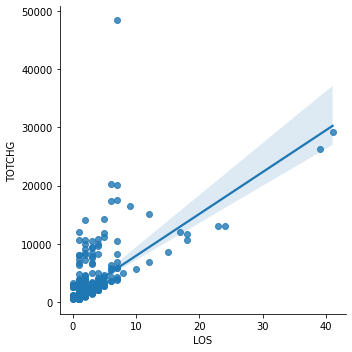

In [44]:
# LOS vs TOTCHG
df = hospital_df[['LOS','TOTCHG']]

# use lmplot
sb.lmplot(x='LOS',y='TOTCHG',data=df)

## Multiple Linear Regression 

Consider age, length of stay and diagnostic category as independent variables and hospital stay cost as dependent variables, and build a multiple linear regression model.

In [ ]:
X = 
y = 
print(X)
print(y)

In [ ]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 100)

In [ ]:
## Building a linear regression model.

lm2 = LinearRegression()
lm2.fit()

In [ ]:
# Print coefficients and intercept
print()
print()

Using the model built, make predictions on the test dataset.

In [ ]:
y_pred = lm2.predict()

Calculate R^2 value

In [ ]:
# For test data
lm2.score()

In [ ]:
# For train data
lm2.score()

Calculate the mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mse2)
print('Mean squared error for the second model is: ', mse2)
print('Root mean squared error for the second model is: ', rmse2)

Print regression summary using statsmodels library

In [ ]:
x_train = sm.add_constant()
model2 = sm.OLS()
result2 = model2.fit()

# Print summary of model 
print()

## Forward and Backward Stepwise Regression

Features were: 'AGE', 'LOS', 'APRDRG'

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
lm2 = LinearRegression()
sfs = SequentialFeatureSelector()
sfs.fit()

In [ ]:
sfs.get_support()

In [ ]:
lm2 = LinearRegression()
sfs = SequentialFeatureSelector()
sfs.fit()

In [ ]:
sfs.get_support()

## Regularization 

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridgelm = 
ridgelm.fit()

In [ ]:
# Print coefficients and intercept
print()
print()

In [ ]:
# Print score for test and train data
print()
print()

In [ ]:
# Try different alpha
ridgelm = 
ridgelm.fit()


In [ ]:
lassolm = 
lassolm.fit()

In [ ]:
# Print coefficients and intercept
print()
print()

In [ ]:
# Print score for test and train data
print()
print()

In [ ]:
# Try different alpha
lassolm = 
lassolm.fit()


## Best subset selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

Features were: 'AGE', 'LOS', 'APRDRG'

In [ ]:
# Best 1-feature model
m1 = SelectKBest()
m1.fit()

In [ ]:
m1.get_support()

In [ ]:
X = 
y = 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.8, random_state = 100)
x_train1 = sm.add_constant(X_train1)
mlm1 = sm.OLS(y_train1, x_train1)
resultlm1 = mlm1.fit()
print(resultlm1.summary())

In [ ]:
# Best 2-features model
m2 = SelectKBest()
m2.fit()
m2.get_support()

In [ ]:
X = 
y = 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.8, random_state = 100)
x_train2 = sm.add_constant(X_train2)
mlm2 = sm.OLS(y_train2, x_train2)
resultlm2 = mlm2.fit()
print(resultlm2.summary())

In [ ]:
# Best 3-features model
m3 = SelectKBest()
m3.fit()
m3.get_support()

In [ ]:
X = 
y = 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.8, random_state = 100)
x_train3 = sm.add_constant(X_train3)
mlm3 = sm.OLS(y_train3, x_train3)
resultlm3 = mlm3.fit()
print(resultlm3.summary())

Confidence and Prediction Intervals

In [ ]:
X = hospital_df[['AGE', 'LOS', 'APRDRG']]
y = hospital_df[['TOTCHG']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state = 100)
x_train = sm.add_constant(X_train)
model2 = sm.OLS(y_train, x_train)
result2 = model2.fit()
print(result2.summary())

In [ ]:
predicted = result2.predict()
pred = result2.get_prediction()
pred_df = pred.summary_frame(alpha=0.1) #95%
#pred_df

In [ ]:
pred_df.shape

In [ ]:
import matplotlib as mpl


In [ ]:
n1 = 24

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.plot(range(n1), y_train, 'o', label = "True: cost")
ax.plot(range(n1), predicted, '-', lw=2, label = "Predicted cost")

ax.fill_between(np.arange(n1), pred_df['obs_ci_lower'], pred_df['obs_ci_upper'], alpha=0.2, color='blue')
ax.fill_between(np.arange(n1), pred_df['mean_ci_lower'], pred_df['mean_ci_upper'], alpha=0.2, color='red')
ax.legend(loc='best');

ax.set_ylabel('Cost')
plt.savefig('CI_intervals.png')